# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [296]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib.pyplot import figure
from pylab import rcParams
from random import randint 
import statistics
import numpy.linalg as la
import math

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [9]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное   - RD
2.   Равномерное  - не нашел
3.   Биноминальное   - MEDV?
4.   Бернулли        - CHAS
5.   Геометрическое  - DIS
6.   Логнормальное   - LSTAT



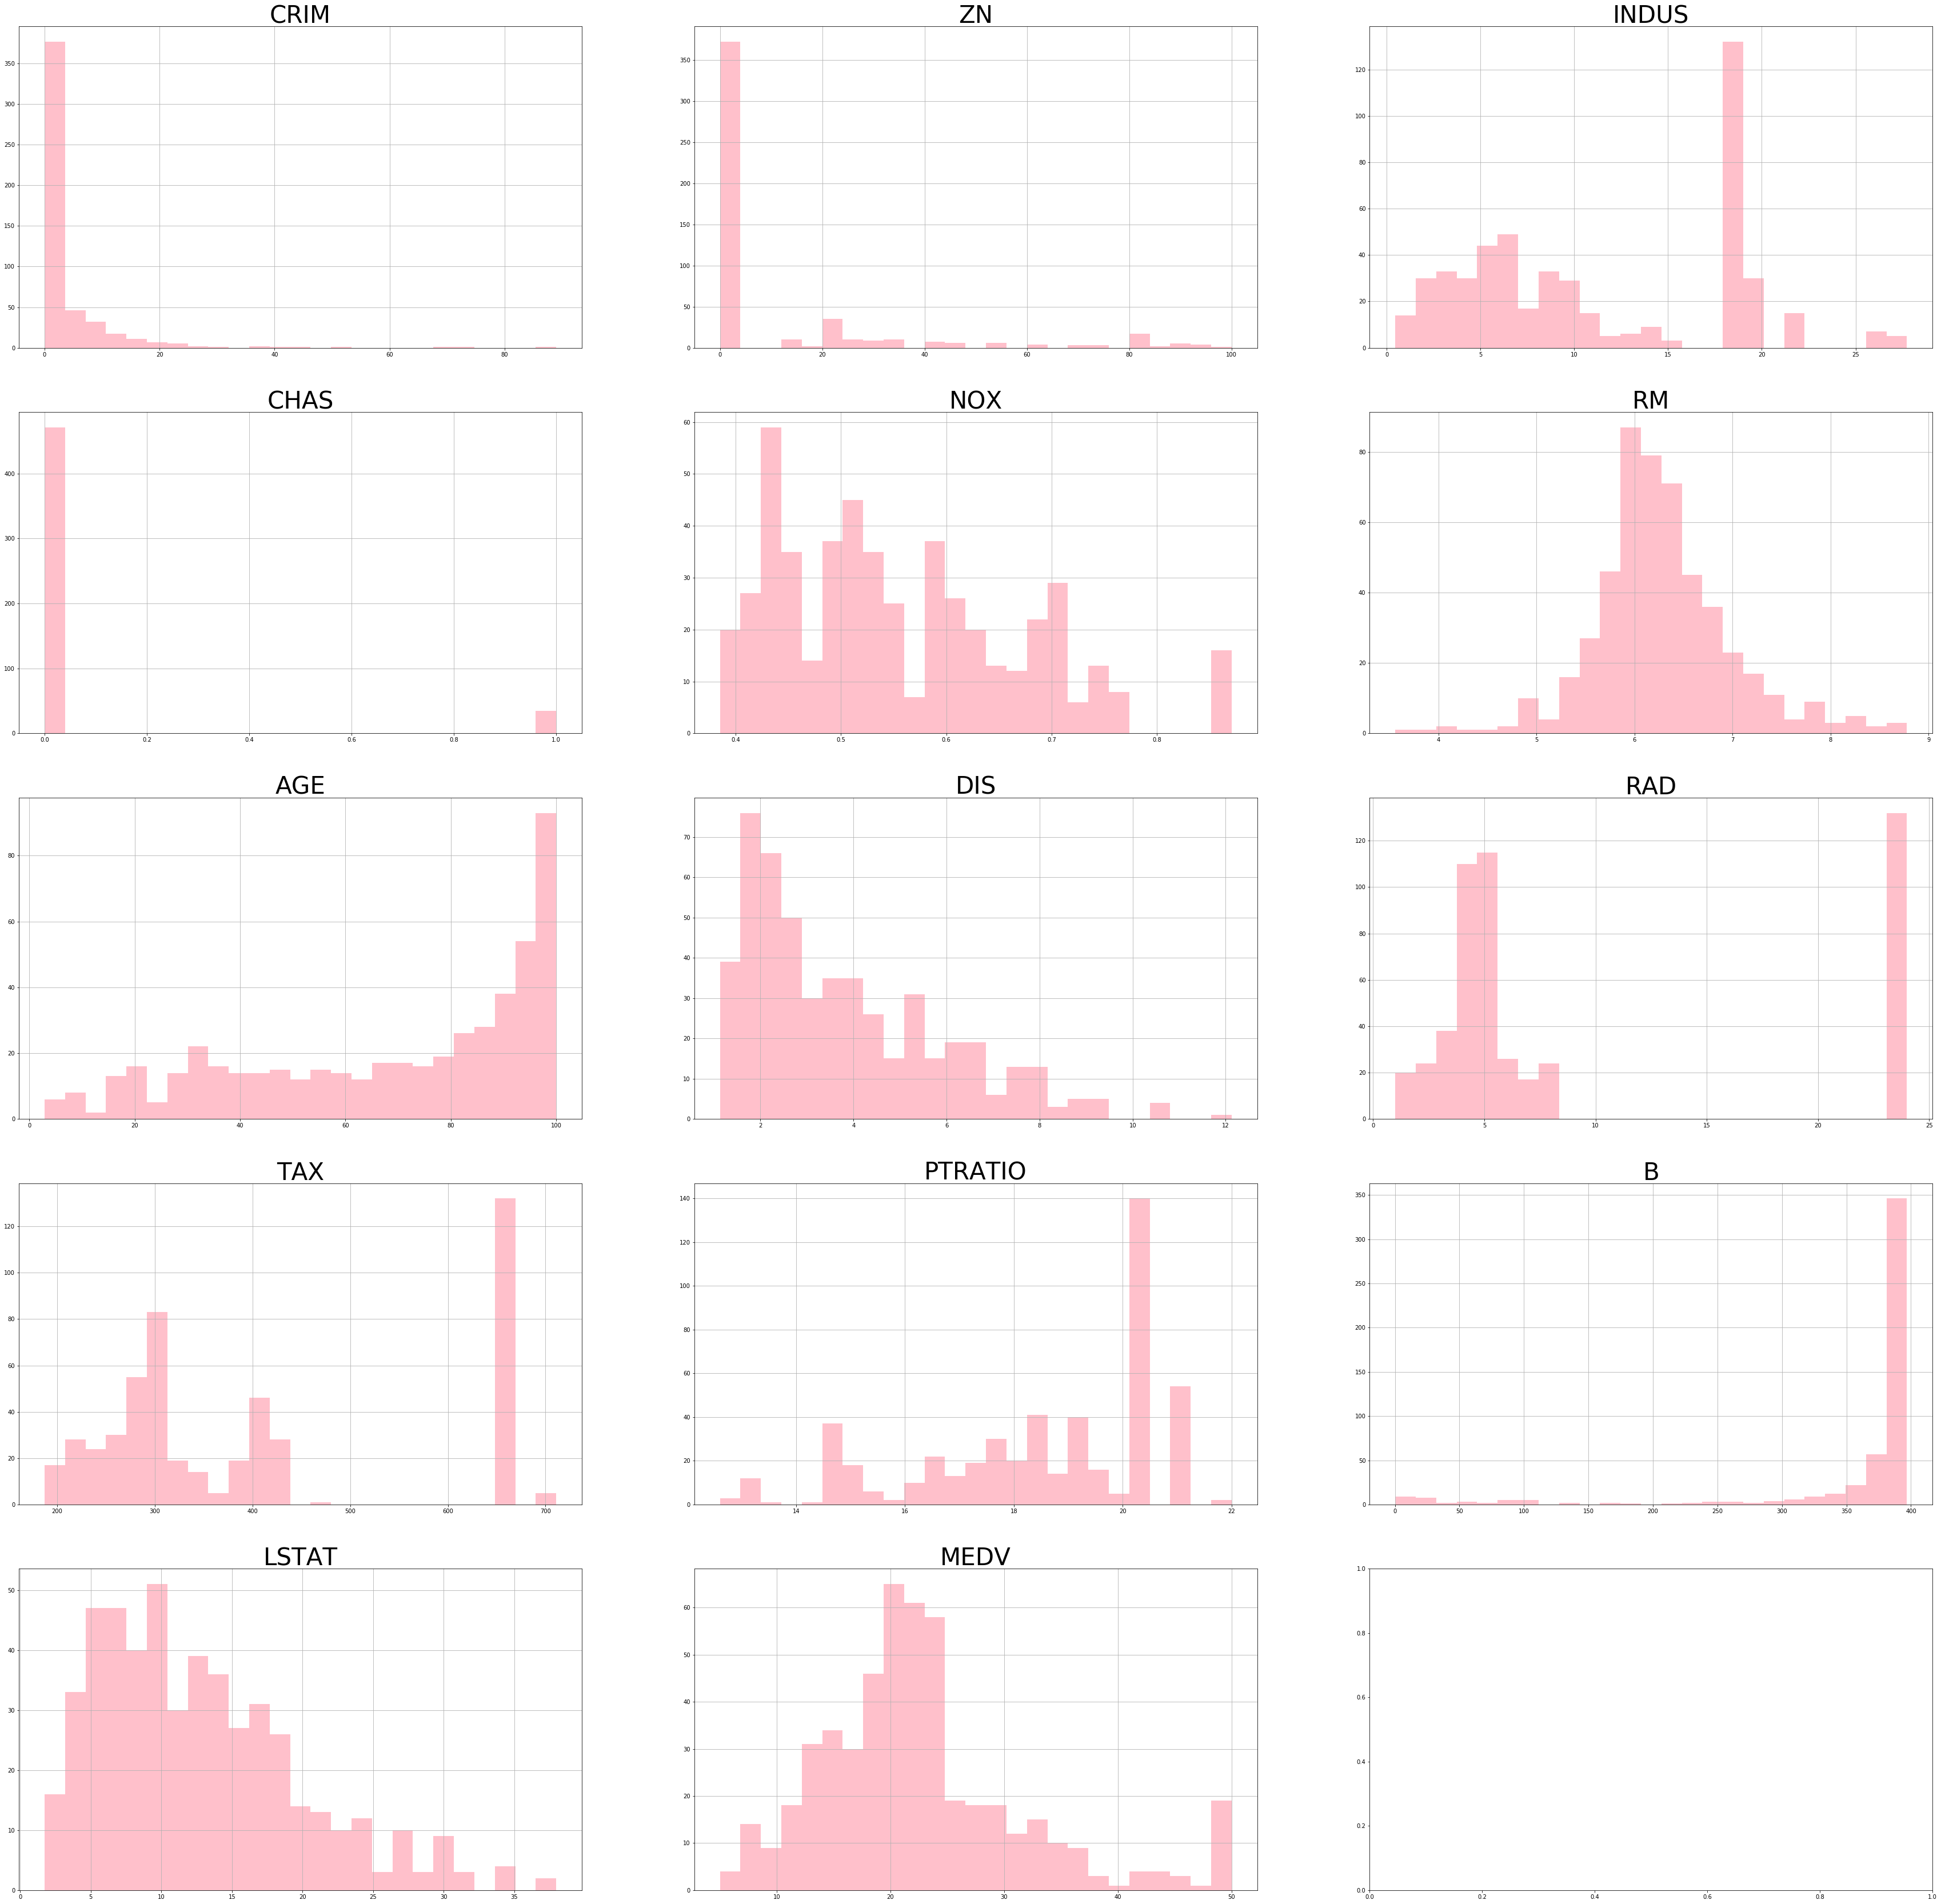

In [10]:
fig, axs = plt.subplots(5, 3)
v = -1
for i in range(14):    
    if i%3 == 0:
        v+=1
        axs[v, i-(3*v)].hist(df[df.columns.values[i]], 25, color= 'pink')
        axs[v, i-(3*v)].set_title(df.columns.values[i], fontsize=42)
        axs[v, i-(3*v)].grid(True)
    else:
        axs[v, i-(3*v)].hist(df[df.columns.values[i]], 25, color= 'pink' )
        axs[v, i-(3*v)].set_title(df.columns.values[i], fontsize=42)
        axs[v, i-(3*v)].grid(True)
rcParams['figure.figsize'] = 60, 60


In [11]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

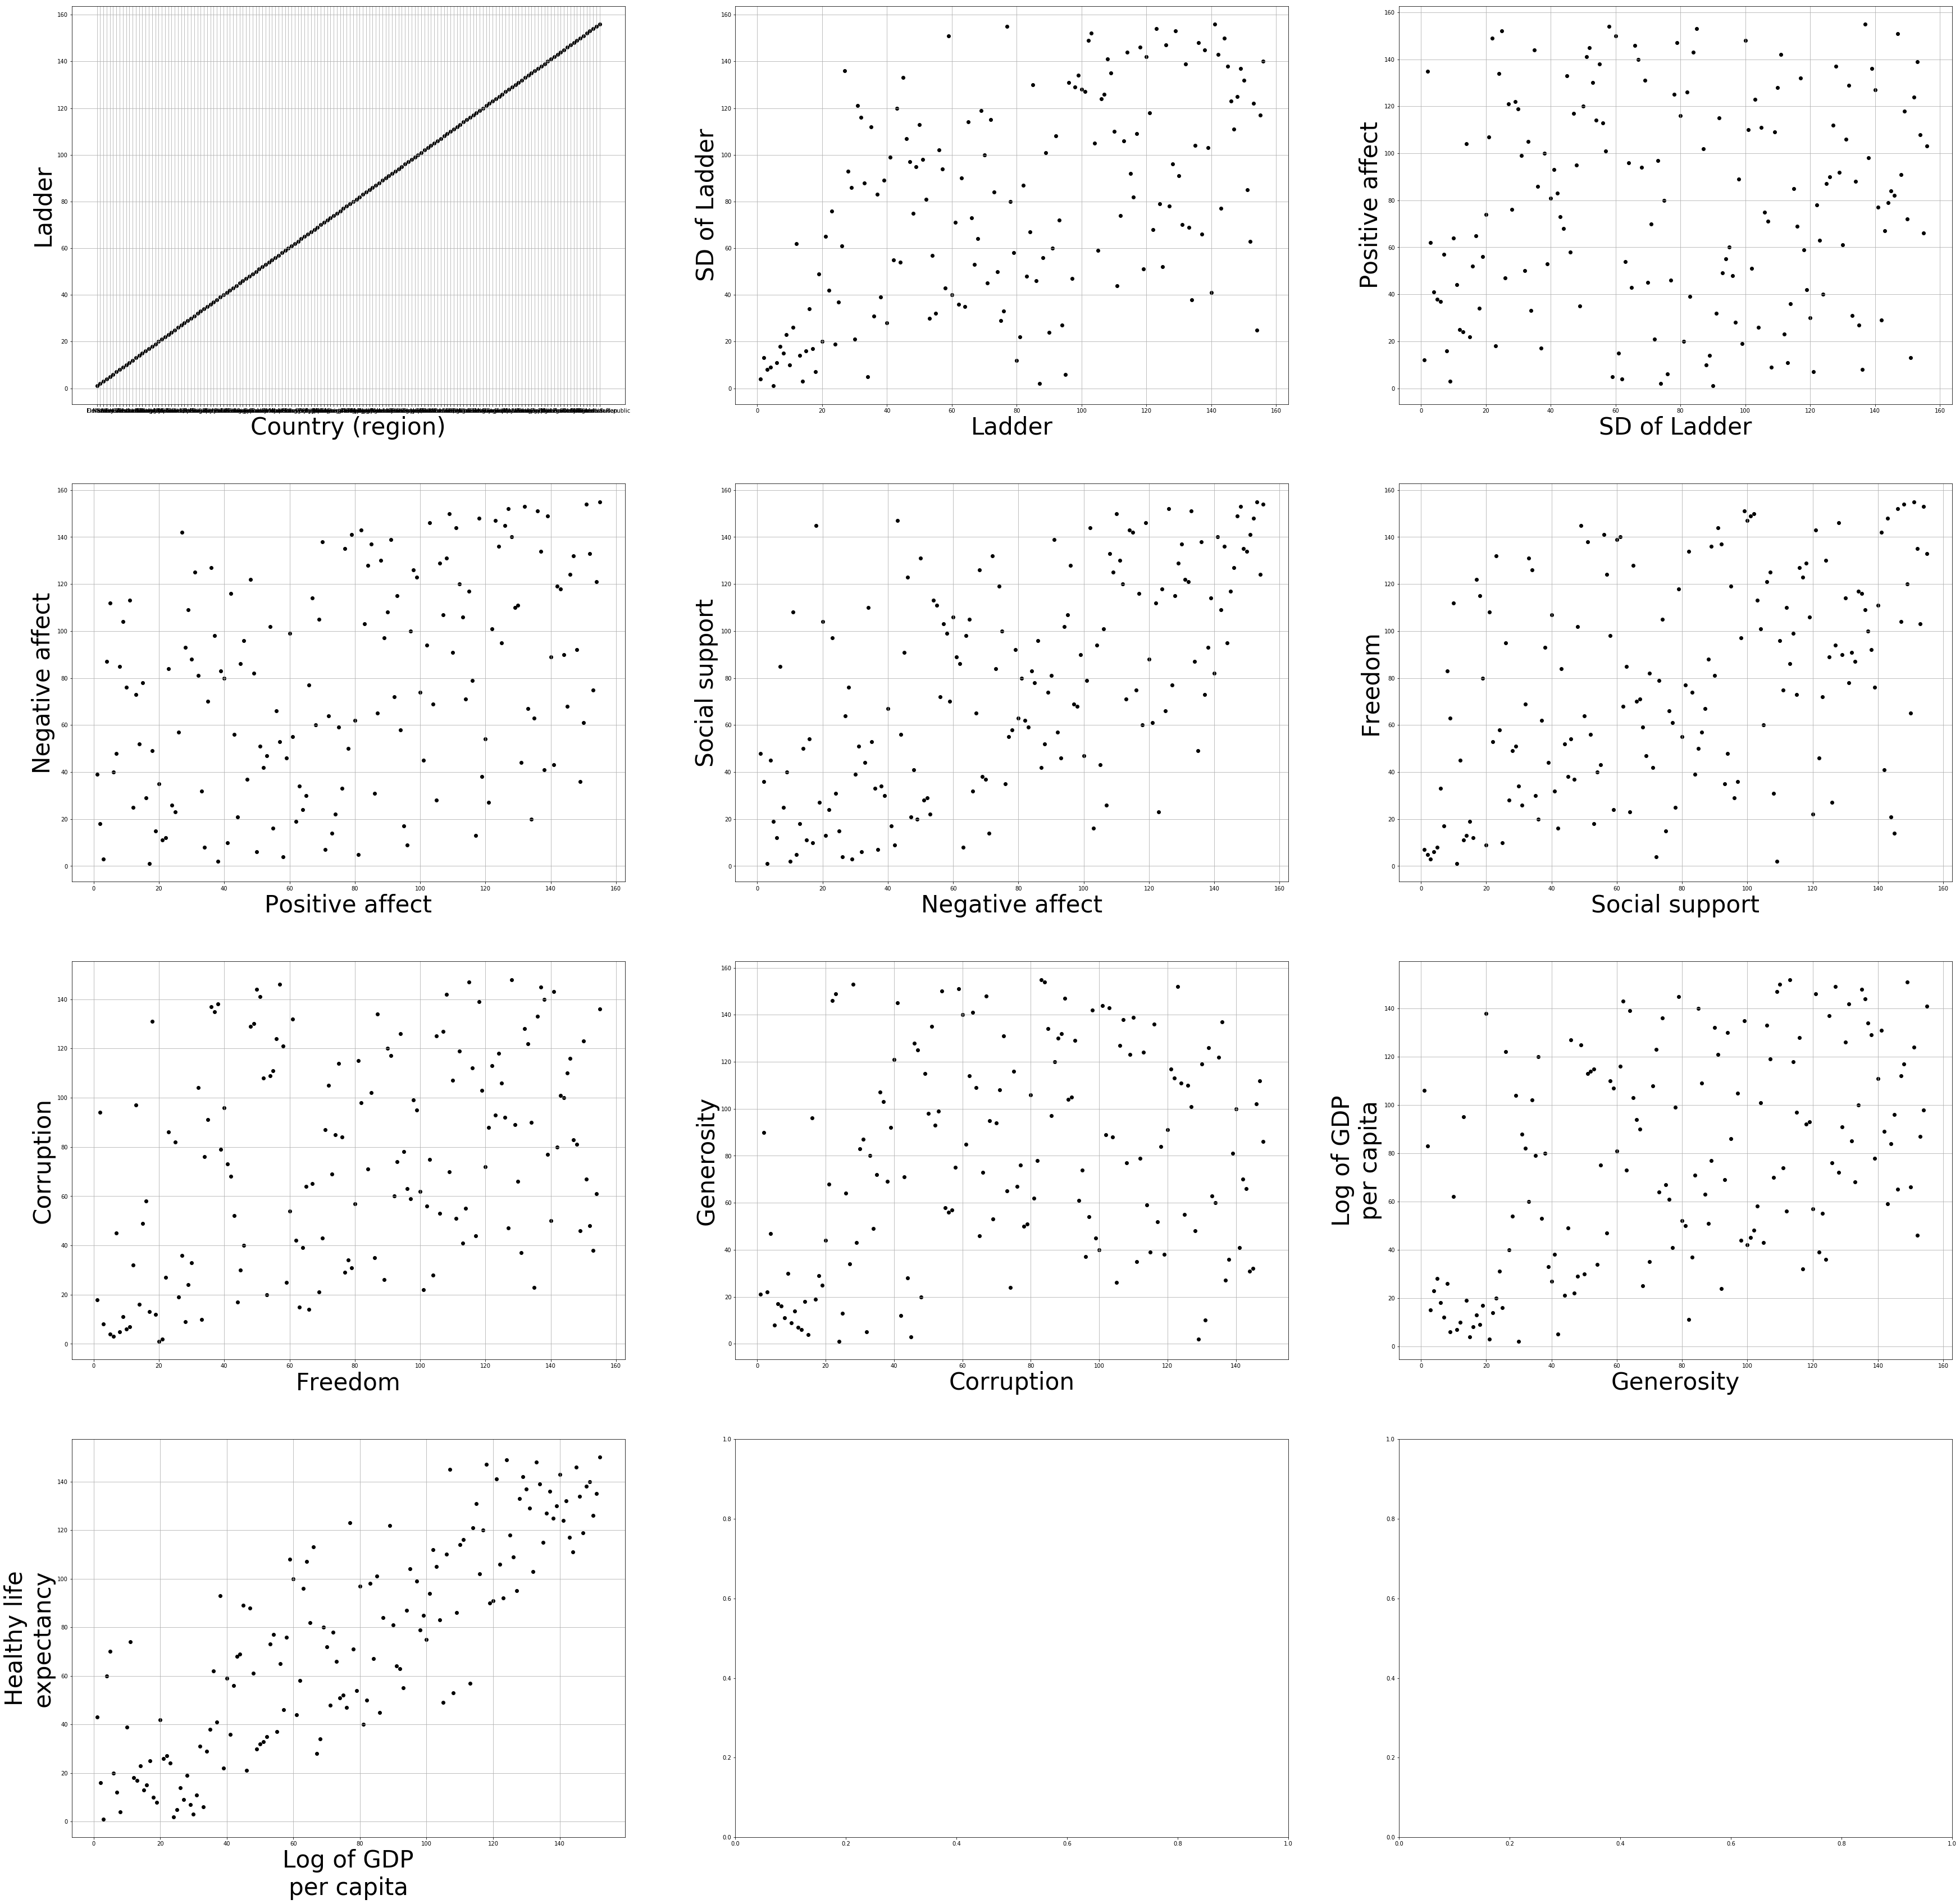

In [5]:
fig, axs = plt.subplots(4, 3)
v = -1
for i in range(10):    
    if i%3 == 0:
        v+=1
        axs[v, i-(3*v)].scatter(df[df.columns.values[i]], df[df.columns.values[i+1]], color= 'black', marker = 'o')
        axs[v, i-(3*v)].set_xlabel(df.columns.values[i], fontsize=42)
        axs[v, i-(3*v)].set_ylabel(df.columns.values[i+1], fontsize=42)
        axs[v, i-(3*v)].grid(True)            
    else:
        axs[v, i-(3*v)].scatter(df[df.columns.values[i]], df[df.columns.values[i+1]], color= 'black', marker = 'o' )
        axs[v, i-(3*v)].set_xlabel(df.columns.values[i], fontsize=42)
        axs[v, i-(3*v)].set_ylabel(df.columns.values[i+1], fontsize=42)
        axs[v, i-(3*v)].grid(True)
rcParams['figure.figsize'] = 60, 60

Или, если имелось ввиду сравнить каждую переменную с каждой, то:

In [17]:
sns.pairplot(data = df ,kind='reg', markers='o')
# Так, если честно ничего не понятно
# я долго пытался найти способ как увеличить это все, но так и не нашел ( буду признателен если вы подскажете)

In [21]:
'''Поэтому есть смысл, поэтапно посмотреть т.е , соотношение свободы со всеми остальными и.т.д'''

fig, axs = plt.subplots(4, 3)
v = -1
for i in range(11):    
    if i%3 == 0:
        v+=1
        axs[v, i-(3*v)].scatter(df[df.columns.values[6]], df[df.columns.values[i]], color= 'black', marker = 'o')
        axs[v, i-(3*v)].set_xlabel(df.columns.values[6], fontsize=42)
        axs[v, i-(3*v)].set_ylabel(df.columns.values[i], fontsize=42)
        axs[v, i-(3*v)].grid(True)            
    else:
        axs[v, i-(3*v)].scatter(df[df.columns.values[6]], df[df.columns.values[i]], color= 'black', marker = 'o' )
        axs[v, i-(3*v)].set_xlabel(df.columns.values[6], fontsize=42)
        axs[v, i-(3*v)].set_ylabel(df.columns.values[i], fontsize=42)
        axs[v, i-(3*v)].grid(True)
rcParams['figure.figsize'] = 60, 60

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [145]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

In [152]:
X = data.iloc[:,1:]

In [153]:
np.cov(X.T)  # (Матрица ковариации)

array([[2088.55066804, 1171.89280576, 1037.04069887, 1097.68016444,
        1745.00719424, 1126.43720452,  437.43597122,  992.82230216,
        1625.96176773, 1661.55015416],
       [1171.89280576, 2127.17014388,  184.69568345, 1298.79928058,
        1268.0323741 ,  520.63165468,  498.41654676,  796.97446043,
        1327.72014388, 1293.22194245],
       [1037.04069887,  184.69568345, 1965.29311408,  694.32127441,
         880.13669065, 1392.96279548,  427.18848921,  826.97194245,
         597.45693731,  661.01243577],
       [1097.68016444, 1298.79928058,  694.32127441, 1980.79527235,
        1369.01438849,  835.04152107,  316.04028777,  697.80791367,
        1091.69558068,  992.67965057],
       [1745.00719424, 1268.0323741 ,  880.13669065, 1369.01438849,
        2099.08633094,  989.15107914,  290.97841727,  918.33453237,
        1592.89208633, 1521.89568345],
       [1126.43720452,  520.63165468, 1392.96279548,  835.04152107,
         989.15107914, 2034.81932169,  784.23597122, 1005

In [155]:
standardized = (X - X.mean()) / X.std()

In [156]:
np.cov(standardized.T) # Матрица корреляций (нормированная матрица ковариаций)

array([[1.        , 0.55598652, 0.51186994, 0.53967651, 0.83341164,
        0.54641367, 0.22439426, 0.48570397, 0.82060756, 0.82667749],
       [0.55598652, 1.        , 0.09033207, 0.63273394, 0.6000868 ,
        0.25024565, 0.25334428, 0.38633667, 0.66397713, 0.6375542 ],
       [0.51186994, 0.09033207, 1.        , 0.35190627, 0.43333255,
        0.69656705, 0.22590489, 0.41706116, 0.31084267, 0.33903234],
       [0.53967651, 0.63273394, 0.35190627, 1.        , 0.67138722,
        0.41593489, 0.16647247, 0.35054093, 0.56575636, 0.50714773],
       [0.83341164, 0.6000868 , 0.43333255, 0.67138722, 1.        ,
        0.47861307, 0.14888995, 0.44813453, 0.80189757, 0.75529202],
       [0.54641367, 0.25024565, 0.69656705, 0.41593489, 0.47861307,
        1.        , 0.4075713 , 0.49822612, 0.38591935, 0.42394886],
       [0.22439426, 0.25334428, 0.22590489, 0.16647247, 0.14888995,
        0.4075713 , 1.        , 0.2811459 , 0.18614014, 0.1489734 ],
       [0.48570397, 0.38633667, 0.4170611

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [146]:
# Исходя из этого видно, что существуют Nan знаение, почистим датасет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [147]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [148]:
data= data.dropna()

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [149]:
num_uniq = len(np.unique(data['Country (region)'].values))
num_uniq

140

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

In [100]:
'''Проблемное место'''
fig = sns.pairplot(data=data, plot_kws=dict(s=500), height = 10, hue = 'Country (region)')
fig.savefig("output.png")
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?


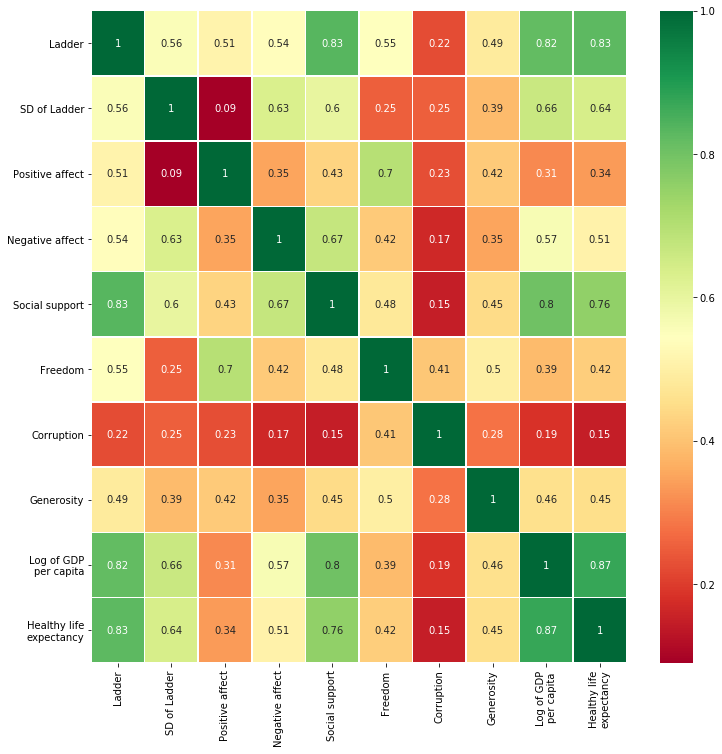

In [98]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Ожидаемо наиболее зависимы показатели, которые изначально предполагались как взаимозависимые 
(Log of GDP per capita,Healthy life expectancy)
Так же на удовлетворение жизнью ( ladder ) больше всего влияет: Social support, Healthy life expectancy, Log of GDP per capita

Имеющим наименьшую взаимосвязь (что довольно необычно) является уровень коррупции(Corruption)

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

In [282]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
Ladder = min_max_scaler.fit_transform(np.array(data['Ladder']).reshape(-1, 1))
Generosity = min_max_scaler.fit_transform(np.array(data['Generosity']).reshape(-1, 1))


Здесь я пытался нормализовать данные и избавить от отрицательных значений

In [287]:
df_ = pd.DataFrame()

Собрал все в 1 датафрейм

In [292]:
df_['Ladder'] = Ladder
df_['Generosity'] = Generosity
df_.head()

Ladder  Generosity
0  0.000000    0.298701
1  0.006452    0.136364
2  0.012903    0.064935
3  0.019355    0.012987
4  0.025806    0.038961

Попытался построить собственный вектор

Собственное значение:  0.13 Собственный вектор:  [0.71797039 0.69607364]


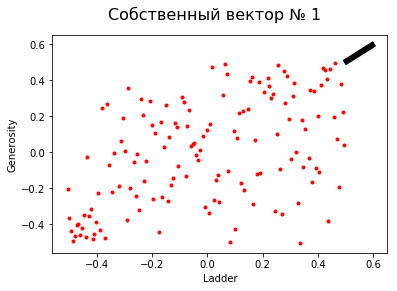

Собственное значение:  0.04 Собственный вектор:  [-0.69607364  0.71797039]


In [293]:
Ladder = df_['Ladder']
Generosity = df_['Generosity']
mean1 = statistics.mean(Ladder)
Ladder -= mean1
mean2 = statistics.mean(Generosity)
Generosity -= mean2
Y = np.vstack((Ladder, Generosity)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Ladder, Generosity, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generosity')
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='black', linewidth=6)
    plt.show()

У меня не получилось корректно построить собственный вектор. Можно было бы "подогнать" вручную, но мне это кажется бессмыслеными с точки зрения анализа,построить по вашему примеру собственный вектор получилось, но не совсем :) вероятно это связано с тем, что в выборке присутсвуют значения как положительные так и отрицательные. Был бы очень рад, если бы вы подсказали где я ошибся,  
#### Cпасибо

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Сложно однозначно сказать какое это значение, т.к с каждым разом оно другое)

In [640]:
model = np.empty(10, dtype=np.float)
for i in range(10):
    dice_throw = np.random.randint(1, 7, size = 1)
    dice_counts = np.sum(dice_throw)
    model[i] = dice_counts
    
plt.hist(model, width=0.8 )
plt.xlabel('Значение')
plt.ylabel('Количество встречаемости значения')
plt.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

In [621]:
model = np.empty(1000, dtype=np.float)
for i in range(1000):
    dice_throw = np.random.randint(1, 7, size = 100)
    dice_counts = np.sum(dice_throw)
    model[i] = dice_counts
    
plt.hist(model, width=10)
plt.xlabel('Значение')
plt.ylabel('Количество встречаемости значения')
plt.show()

Распределение стремится к нормальному

сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы имеет распределение, близкое к нормальному.